# 📊 Mastering Matplotlib for Machine Learning

This notebook is a **detailed walkthrough** of Matplotlib, covering everything from basics to ML-specific visualizations. Each section includes **explanations + code examples**.

In [1]:
# pip install scikit-learn
# pip install matplotlib
# pip install seaborn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# For ML examples
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

## 1. Introduction
- **Matplotlib** is Python’s core 2D plotting library.
- It allows creation of line plots, bar charts, scatter plots, histograms, heatmaps, etc.
- Other libraries like Seaborn build on top of Matplotlib.

Typical convention:
```python
import matplotlib.pyplot as plt
import numpy as np
```

## 2. First Plot
The simplest way to create a plot is using `plt.plot()`.

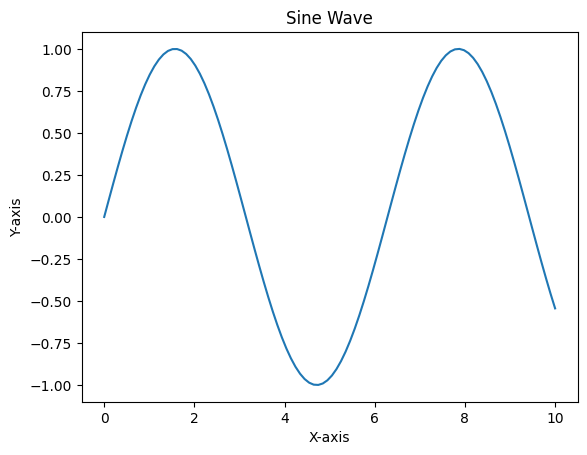

In [27]:

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title("Sine Wave")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


## 3. Anatomy of a Matplotlib Figure
- **Figure**: The whole canvas.
- **Axes**: A single plot (can be multiple in one Figure).
- **Axis**: The x and y scales.
- **Artist**: Everything drawn (lines, text, etc.).

Two APIs:
1. **Stateful (pyplot)**: Uses `plt.plot(...)`.
2. **Object-oriented**: Uses `fig, ax = plt.subplots()`.

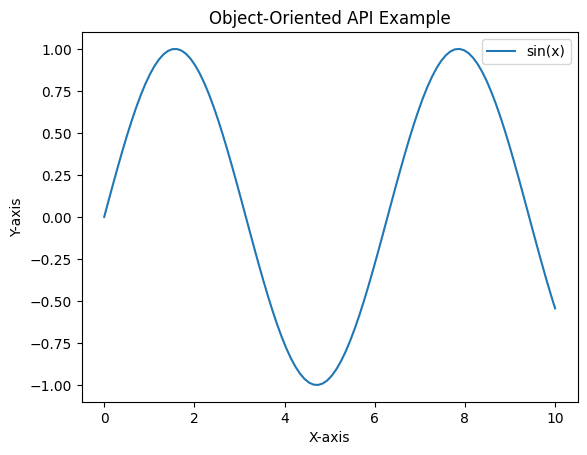

In [13]:

fig, ax = plt.subplots()
ax.plot(x, y, label="sin(x)")
ax.set_title("Object-Oriented API Example")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.legend()
plt.show()


## 4. Basic Plot Types

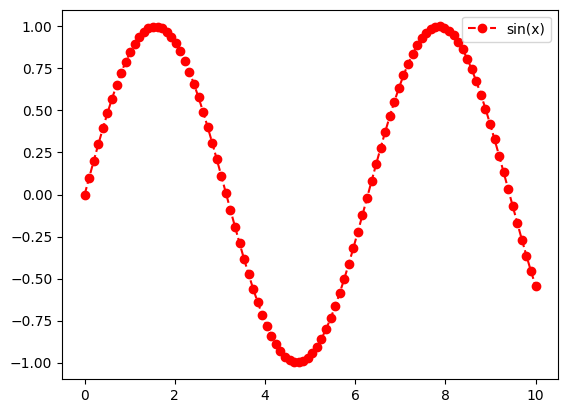

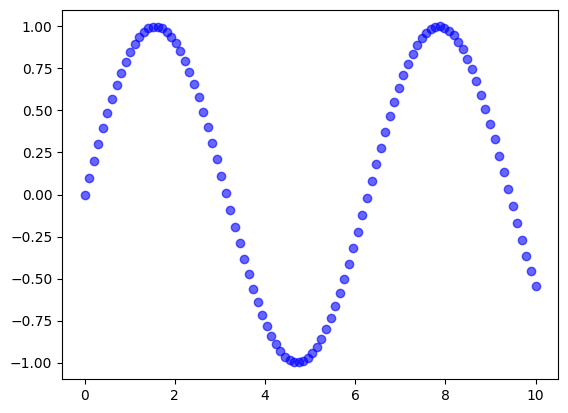

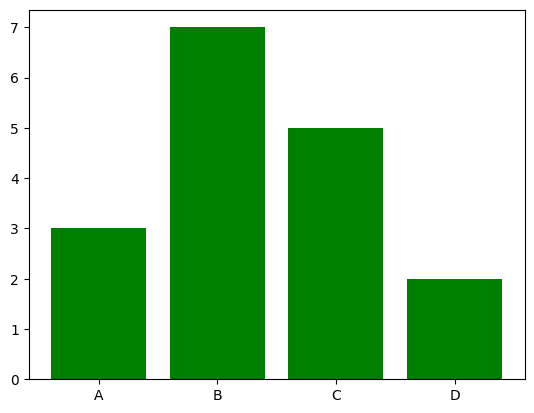

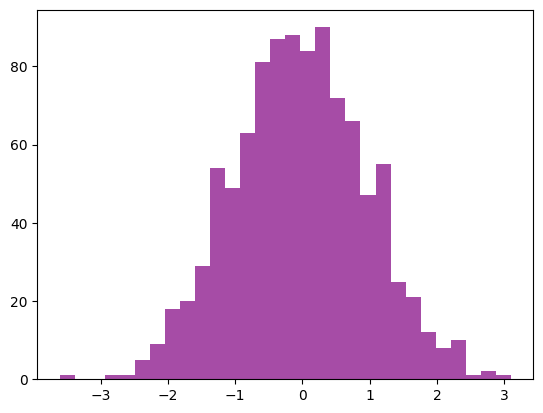

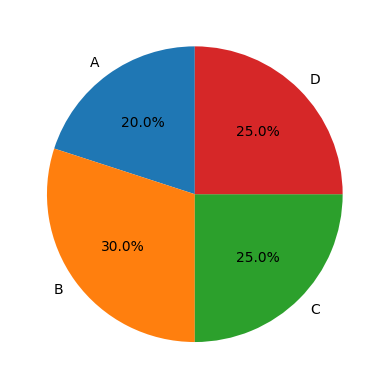

In [14]:

# Line plot
plt.plot(x, y, color="red", linestyle="--", marker="o", label="sin(x)")
plt.legend()
plt.show()

# Scatter plot
plt.scatter(x, y, color="blue", alpha=0.6)
plt.show()

# Bar chart
categories = ["A", "B", "C", "D"]
values = [3, 7, 5, 2]
plt.bar(categories, values, color="green")
plt.show()

# Histogram
data = np.random.randn(1000)
plt.hist(data, bins=30, color="purple", alpha=0.7)
plt.show()

# Pie chart
sizes = [20, 30, 25, 25]
labels = ["A", "B", "C", "D"]
plt.pie(sizes, labels=labels, autopct="%.1f%%", startangle=90)
plt.show()


## 5. Subplots
Multiple plots in one figure using `plt.subplots()`.

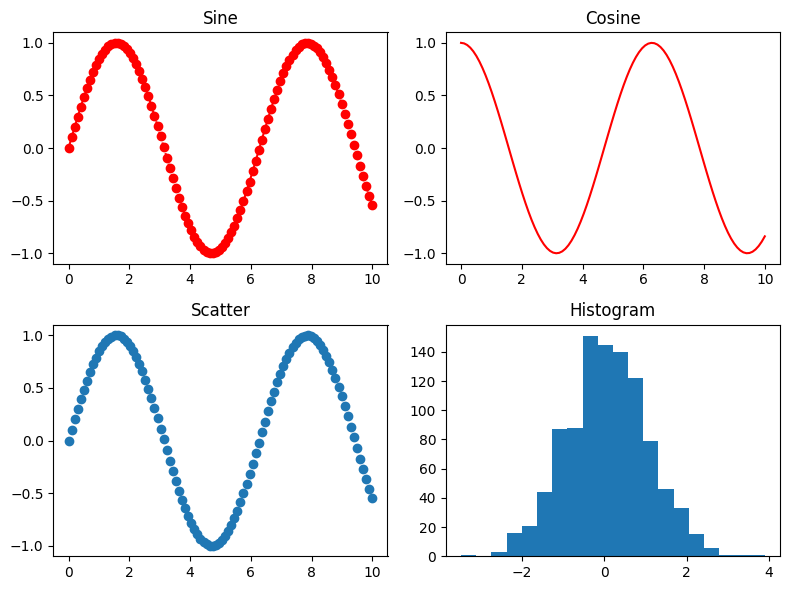

In [16]:

fig, axs = plt.subplots(2, 2, figsize=(8, 6))

axs[0, 0].plot(x, y, color="red", linestyle="--", marker="o", label="sin(x)")
axs[0, 0].set_title("Sine")

axs[0, 1].plot(x, np.cos(x), color="red")
axs[0, 1].set_title("Cosine")

axs[1, 0].scatter(x, np.sin(x))
axs[1, 0].set_title("Scatter")

axs[1, 1].hist(np.random.randn(1000), bins=20)
axs[1, 1].set_title("Histogram")

plt.tight_layout()
plt.show()


## 6. Styling & Customization

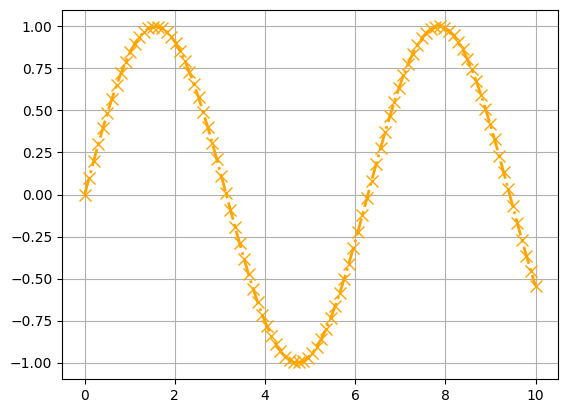

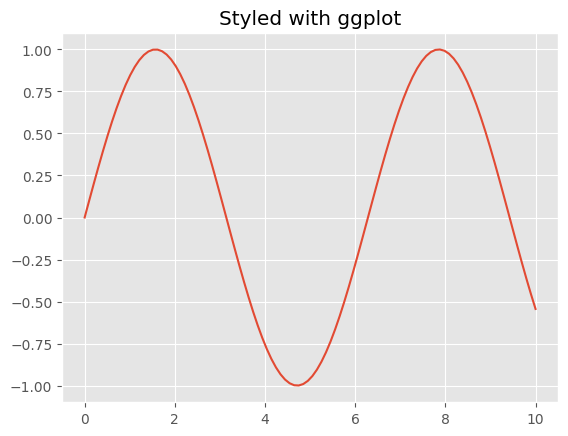

In [8]:

plt.plot(x, y, color="orange", linewidth=2, linestyle="-.", marker="x", markersize=8)
plt.grid(True)
plt.show()

plt.style.use("ggplot")
plt.plot(x, np.sin(x))
plt.title("Styled with ggplot")
plt.show()

plt.style.use("default")  # reset


## 7. Advanced Visualizations

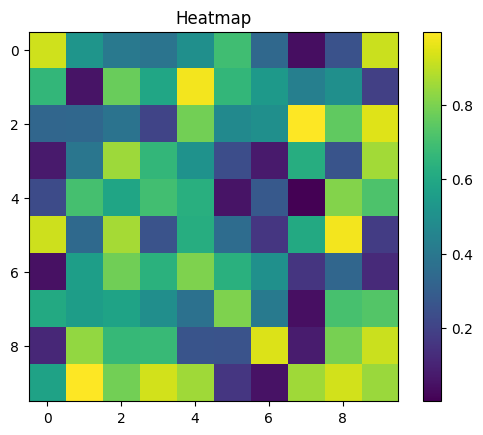

In [9]:

# Heatmap using imshow
data = np.random.rand(10, 10)
plt.imshow(data, cmap="viridis", interpolation="nearest")
plt.colorbar()
plt.title("Heatmap")
plt.show()


## 8. Matplotlib + Pandas
Pandas integrates tightly with Matplotlib, so DataFrames can plot directly.

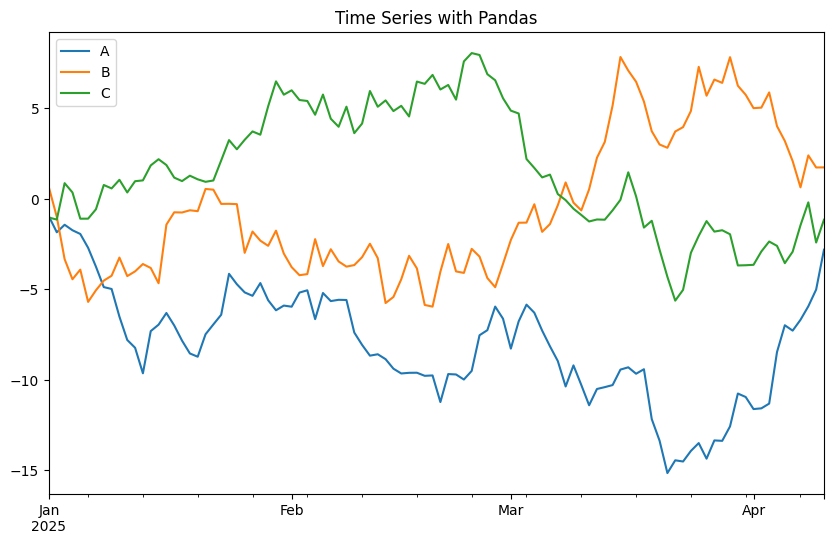

In [19]:

df = pd.DataFrame({
    "A": np.random.randn(100).cumsum(),
    "B": np.random.randn(100).cumsum(),
    "C": np.random.randn(100).cumsum()
}, index=pd.date_range("2025-01-01", periods=100))

df.plot(figsize=(10,6), title="Time Series with Pandas")
plt.show()


## 9. ML-Specific Visualizations

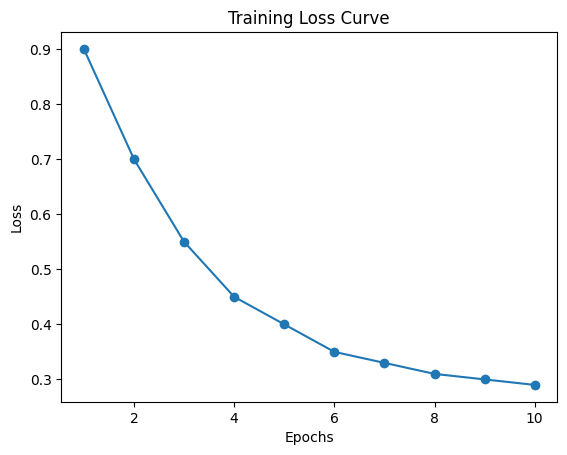

In [21]:

# Training loss curve
epochs = np.arange(1, 11)
loss = [0.9, 0.7, 0.55, 0.45, 0.4, 0.35, 0.33, 0.31, 0.3, 0.29]

plt.plot(epochs, loss, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


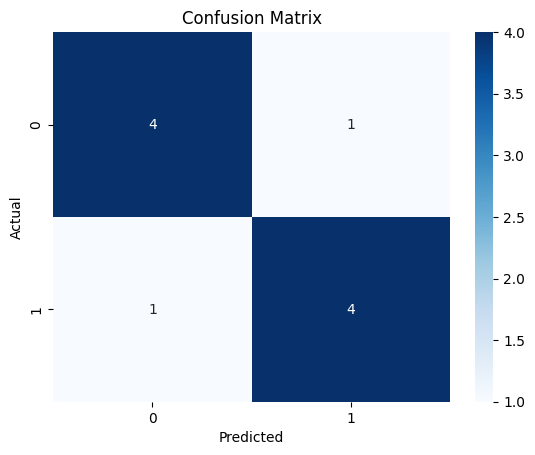

In [23]:

# Confusion matrix (if sklearn available)

y_true = [0,0,1,1,0,1,0,1,1,0]
y_pred = [0,1,1,1,0,1,0,0,1,0]

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


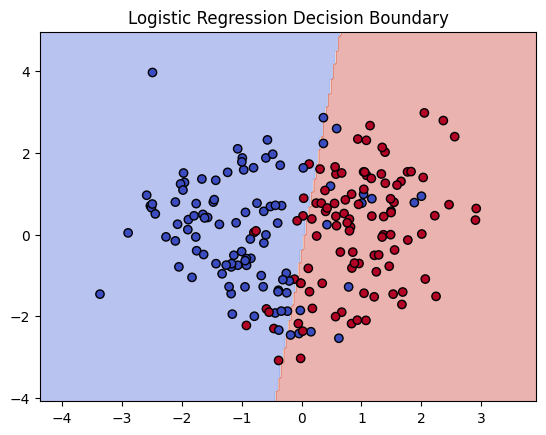

In [24]:

# Decision boundary (if sklearn available) 
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, random_state=42)
clf = LogisticRegression().fit(X, y)

xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
                        np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap="coolwarm")
plt.scatter(X[:,0], X[:,1], c=y, edgecolor="k", cmap="coolwarm")
plt.title("Logistic Regression Decision Boundary")
plt.show() 


## 10. Saving & Exporting

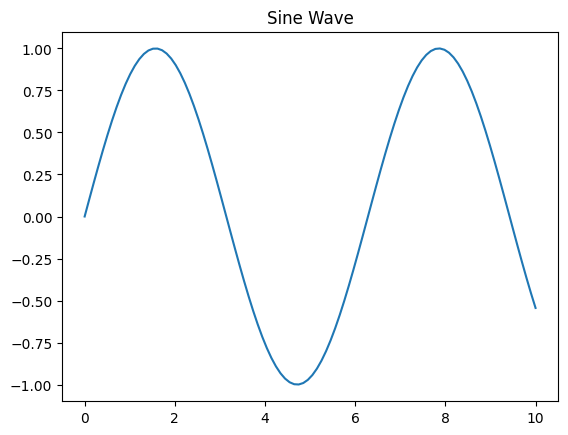

In [28]:
plt.plot(x, y)
plt.title("Sine Wave")
plt.savefig("sine_wave.png", dpi=300)
plt.show()


## 11. Best Practices & Tips
- Use **object-oriented API** (`fig, ax`) for more complex plots.
- Use `plt.style.use(...)` for consistent styles.
- Always label axes and add legends.
- Use `tight_layout()` to avoid overlapping labels.
- Save plots with `plt.savefig()` for reproducibility.